Python Code_Part 1

In [1]:
#load required packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

1. Perform exploratory data analysis to analyze the survey dataset and to summarize its main characteristics. Present 3 graphical figures that represent different trends in the data. For your explanatory data analysis, you can consider Country, Age, Education, Professional Experience, and Salary.

Load the dataset and take a look at the dataset

In [2]:
df = pd.read_csv('clean_kaggle_data.csv') # read the csv
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (285) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,...,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,...,NaN,NaN,Qlik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,Other,Kaggle Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DataRobot AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,MATLAB,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15386,25967,323,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15387,25968,910,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K

Basic description of the whole dataset

In [3]:
df.describe()

,Unnamed: 0,Time from Start to Finish (seconds),Q25,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER
count,15391.000000,1.539100e+04,15391.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,12955.828926,9.260347e+03,49116.009356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7493.072541,8.849740e+04,98090.207788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.210000e+02,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6511.000000,5.450000e+02,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,12916.000000,7.500000e+02,15000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,19440.500000,1.140000e+03,60000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,25973.000000,2.488653e+06,1000000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In order to perform analysis of the dataset, only several of the columns are needed. Therefore, a new data set for analysis purpose have been built and names of these columns have been added, which includes Age, Gender, Country, Education, Professional Experience and Salary.

In [4]:
df_analysis = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q6', 'Q25']] # build new df
# add names of columns
df_analysis.columns = ['Age', 'Gender', 'Country', 'Education', 'Professional Experience', 'Salary']
df_analysis

,Age,Gender,Country,Education,Professional Experience,Salary
0,50-54,Man,India,Bachelor’s degree,5-10 years,30000
1,50-54,Man,Indonesia,Master’s degree,20+ years,70000
2,22-24,Man,Pakistan,Master’s degree,1-3 years,1000
3,45-49,Man,Mexico,Doctoral degree,20+ years,40000
4,45-49,Man,India,Doctoral degree,< 1 years,40000
...,...,...,...,...,...,...
15386,30-34,Man,India,Bachelor’s degree,1-3 years,4000
15387,35-39,Man,South Korea,Bachelor’s degree,5-10 years,90000
15388,30-34,Man,Egypt,Bachelor’s degree,1-3 years,20000
15389,50-54,Man,Sweden,Doctoral degree,I have never written code,1000


In [5]:
df_analysis.describe() # basic description of the new dataset

,Salary
count,15391.000000
mean,49116.009356
std,98090.207788
min,1000.000000
25%,2000.000000
50%,15000.000000
75%,60000.000000
max,1000000.000000


In order to provide graphical figures that represent different trends in the data, the trend between different age groups and their average salary have been studied first. 

In [6]:
# a new df containing age and salary
df_age_salary = df_analysis[['Age','Salary']]
# group age into different groups and present mean salary in each group
df_age_salary = df_age_salary.groupby('Age').mean()
df_age_salary

,Salary
Age,
18-21,15722.878625
22-24,19918.738050
25-29,29213.910355
30-34,47932.025895
35-39,59316.265060
40-44,67760.798429
45-49,82403.593339
50-54,82304.677623
55-59,97216.269841


Line plot of averagee salary among different age groups is provided as below:

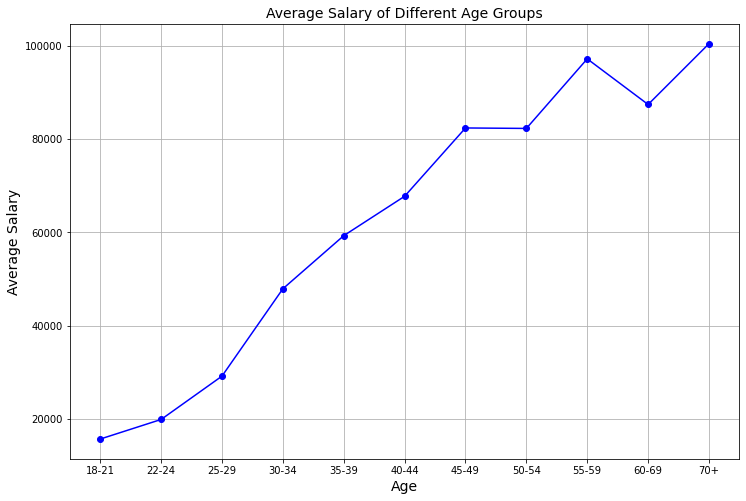

In [7]:
plt.figure(figsize=(12,8))
plt.plot(df_age_salary.index, df_age_salary['Salary'], color='blue', marker='o')
plt.title('Average Salary of Different Age Groups', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Average Salary', fontsize=14)
plt.grid(True)
plt.show()

In addition the trend between different education levels and their average salary have been studied.

In [8]:
# a new df containing education and salary
df_education_salary = df_analysis[['Education','Salary']]
# group education into different groups and present mean salary in each group
df_education_salary = df_education_salary.groupby('Education').mean()
df_education_salary = df_education_salary.sort_values(['Salary']) # reframe the order of the group
df_education_salary

,Salary
Education,
I prefer not to answer,34191.616766
Bachelor’s degree,35578.291815
No formal education past high school,38208.333333
Some college/university study without earning a bachelor’s degree,41990.616622
Master’s degree,52706.868657
Professional doctorate,67465.517241
Doctoral degree,70641.181777


Line plot of avergae salary among different education groups is provided as below:

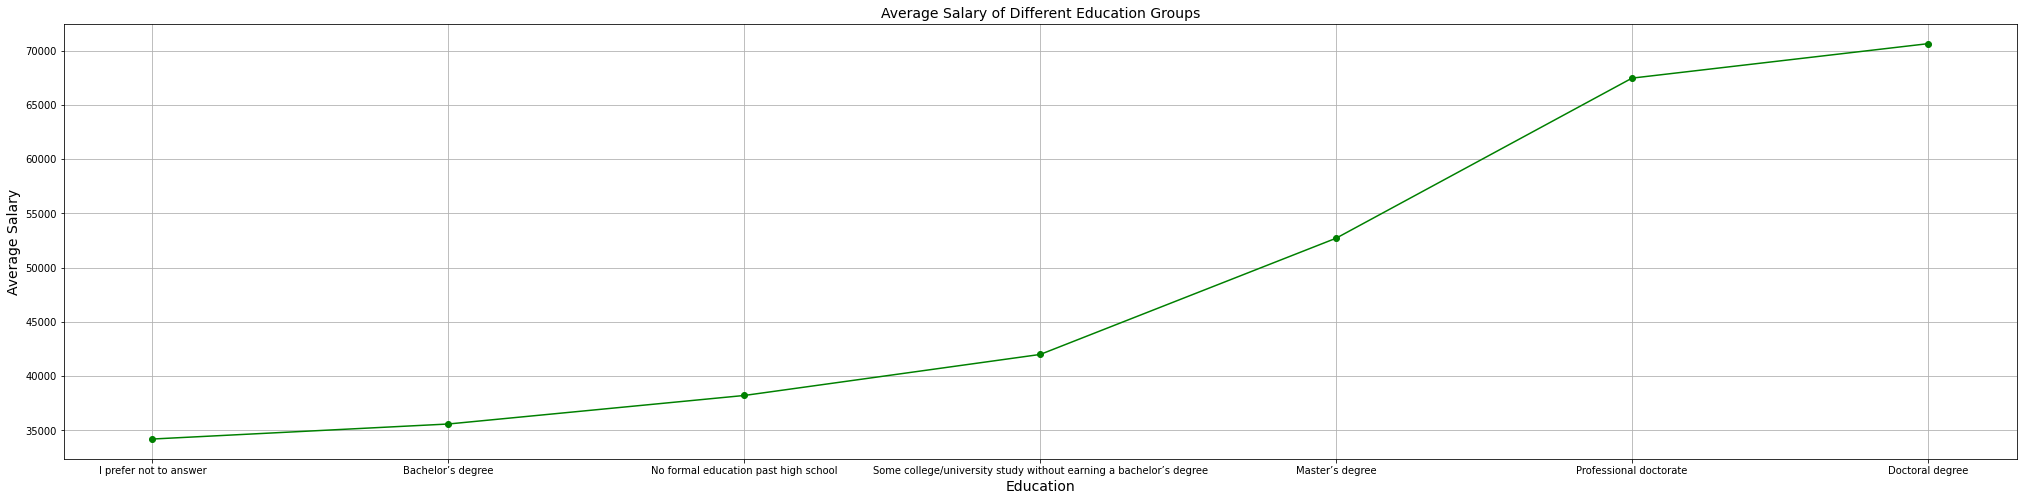

In [9]:
plt.figure(figsize=(35,8))
plt.plot(df_education_salary.index, df_education_salary['Salary'], color='green', marker='o')
plt.title('Average Salary of Different Education Groups', fontsize=14)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Average Salary', fontsize=14)
plt.grid(True)
plt.show()

Furthermore, the trend between different professional experience length and their average salary have been studied.

In [10]:
# a new df containing professional experience and salary
df_professionalexperience_salary = df_analysis[['Professional Experience','Salary']]
# group professional experience into different groups and present mean salary in each group
df_professionalexperience_salary = df_professionalexperience_salary.groupby('Professional Experience').mean()
df_professionalexperience_salary = df_professionalexperience_salary.sort_values(['Salary']) # reframe the order of the group
df_professionalexperience_salary

,Salary
Professional Experience,
< 1 years,22604.141291
I have never written code,27651.404787
1-3 years,27763.885126
3-5 years,40831.369362
5-10 years,62156.716418
10-20 years,83355.904659
20+ years,105358.682266


Line plot of avergae salary among different professional experience groups is provided as below:

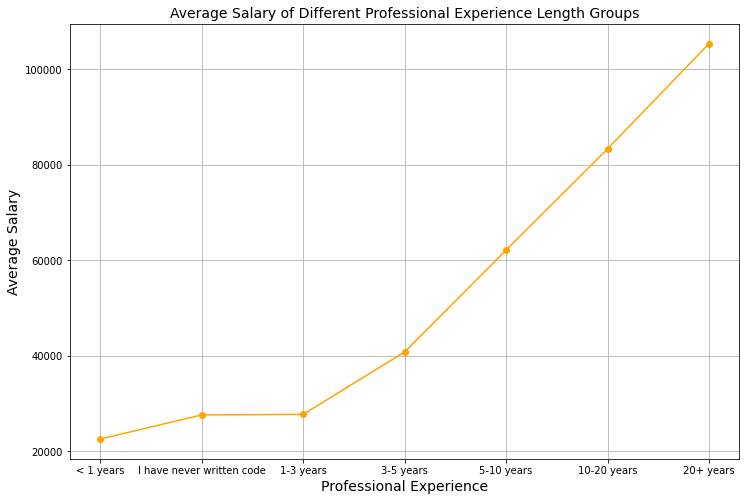

In [11]:
plt.figure(figsize=(12,8))
plt.plot(df_professionalexperience_salary.index, df_professionalexperience_salary['Salary'], color='orange', marker='o')
plt.title('Average Salary of Different Professional Experience Length Groups', fontsize=14)
plt.xlabel('Professional Experience', fontsize=14)
plt.ylabel('Average Salary', fontsize=14)
plt.grid(True)
plt.show()

2. Estimating the difference between average salary (Q25) of men vs. women (Q2).


a. Compute and report descriptive statistics for each group (remove missing data, if
necessary).

Descriptive statistics for Men:

In [12]:
# a new df containing salary of men
df_men_salary = pd.DataFrame(df_analysis[df_analysis['Gender'] == 'Man']['Salary'])
# drop missing data
df_men_salary = df_men_salary.dropna() 
# descriptive statistics
df_men_salary.describe()

,Salary
count,12642.000000
mean,51193.600696
std,99979.274378
min,1000.000000
25%,2000.000000
50%,20000.000000
75%,60000.000000
max,1000000.000000


Descriptive statistics for Women:

In [13]:
# a new df containing salary of women
df_women_salary = pd.DataFrame(df_analysis[df_analysis['Gender'] == 'Woman']['Salary'])
# drop missing data
df_women_salary = df_women_salary.dropna()
# descriptive statistics
df_women_salary.describe()

,Salary
count,2482.000000
mean,34816.881547
std,72017.347888
min,1000.000000
25%,1000.000000
50%,7500.000000
75%,50000.000000
max,1000000.000000


b. If suitable, perform a two-sample t-test with a 0.05 threshold. Explain your rationale.

First we print the variance of these two groups.

In [14]:
print(np.var(df_men_salary['Salary']))
print(np.var(df_women_salary['Salary']))

9995064618.913923
5184408752.080326


Since these two variances are approximately homogenoues, we proceed to two-sample t-test with equal variance.

Since our sample is considered as a large sample (sample size greater than 50), we could proceed with the t-test without having it to be normal or non-normal distributed.

Below are the hypothesis of the two-sample t-test:

H0: average salary of men is equal to average salary of women

Ha: average salary of men is different from average salary of women

From the analysis above, we now proceed to conduct a two-sample t-test .

In [15]:
# t-test result
stats.ttest_ind(df_men_salary['Salary'], df_women_salary['Salary'])

Ttest_indResult(statistic=7.774059663603156, pvalue=8.088812859676161e-15)

Since the p-value of t-test is much smaller than 0.05, we reject the null hypothesis that average salary of men is equal to average salary of women. 

c. Bootstrap your data for comparing the mean of salary for the two groups. Note that the number of instances you sample from each group should be relative to its size. Use 1000 replications. Plot two bootstrapped distributions (for men and women) and the distribution of the difference in means.

Bootstrap:

In [16]:
# define new empty list
men_salary = []
women_salary = []
difference_in_mean = []

# bootstrap
for i in range(1000): # 1000 replications
    men_salary_bootstrap = np.random.choice(df_men_salary['Salary'], size=df_men_salary['Salary'].shape[0], replace=True)
    men_salary.append(men_salary_bootstrap.mean()) # append mean to the new list

    women_salary_bootstrap = np.random.choice(df_women_salary['Salary'], size=df_women_salary['Salary'].shape[0], replace=True)
    women_salary.append(women_salary_bootstrap.mean()) # append mean to the new list

    difference = men_salary_bootstrap.mean() - women_salary_bootstrap.mean()
    difference_in_mean.append(difference) # append mean to the new list

Plot two bootstrapped distributions (for men and women):

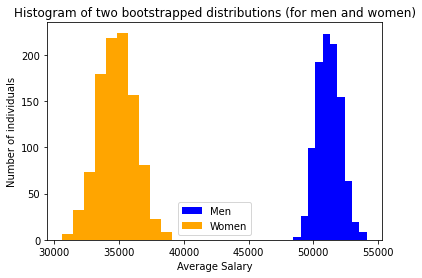

In [17]:
plt.hist(men_salary, color='blue')
plt.hist(women_salary, color='orange') 
plt.title('Histogram of two bootstrapped distributions (for men and women)') 
plt.legend(['Men', 'Women'])  
plt.xlabel('Average Salary')
plt.ylabel('Number of individuals')
plt.show()

Plot the distribution of the difference in means:

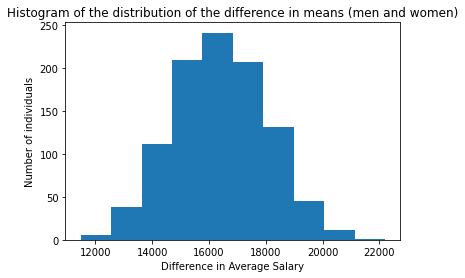

In [18]:
plt.hist(difference_in_mean)
plt.title('Histogram of the distribution of the difference in means (men and women)') 
plt.xlabel('Difference in Average Salary')
plt.ylabel('Number of individuals')
plt.show()

d. If suitable, perform a two-sample t-test with a 0.05 threshold on the bootstrapped data. Explain your rationale.


After bootstrap, the data would be approximately normal and the printed result of variances below shows similar variance. Therefore, we conduct a two-sample t-test as below:

In [19]:
print(np.var(men_salary))
print(np.var(women_salary))

828623.1187482683
1930156.8173524237


H0: average salary of men is equal to average salary of women on the bootstrapped data

Ha: average salary of men is different from average salary of women on the bootstrapped data

In [20]:
# t test
stats.ttest_ind(men_salary, women_salary)

Ttest_indResult(statistic=311.6917032399088, pvalue=0.0)

Since the p-value of t-test is smaller than 0.05, we reject the null hypothesis that average salary of men is equal to average salary of women on the bootstrapped data.

e. Comment on your findings

Comment: The minimum and maximum salary of men and women are the same, which indicate that men and women all have the ability to achieve very high salary if they meet the requirements and are good enough. However, the mean and median salary of women are much less than men, and from our t-test and t-test on bootstrapped data, they all show that the average salary of women and men are not equal, which indicate that it might be harder for women to achieve as much salary as men in this industry under current situation, which implies the current nature of women in this industry.

3. Select “highest level of formal education” (Q4) from the dataset and repeat steps a to e, this time use analysis of variance (ANOVA) instead of t-test for hypothesis testing to compare the means of salary for three groups (Bachelor’s degree, Doctoral degree, and Master’s degree)

a. Compute and report descriptive statistics for each group (remove missing data, if
necessary).

Descriptive statistics for Bachelor degree:

In [21]:
# a new df containing salary of bachelor
df_Bachelor_salary = pd.DataFrame(df_analysis[df_analysis['Education'] == 'Bachelor’s degree']['Salary'])
# drop missing data
df_Bachelor_salary = df_Bachelor_salary.dropna()
# descriptive statistics
df_Bachelor_salary.describe()

,Salary
count,4777.000000
mean,35578.291815
std,89382.060777
min,1000.000000
25%,1000.000000
50%,7500.000000
75%,40000.000000
max,1000000.000000


Descriptive statistics for Master degree:

In [22]:
# a new df containing salary of master
df_Master_salary = pd.DataFrame(df_analysis[df_analysis['Education'] == 'Master’s degree']['Salary'])
# drop missing data
df_Master_salary = df_Master_salary.dropna()
# descriptive statistics
df_Master_salary.describe()

,Salary
count,6799.000000
mean,52706.868657
std,90928.786678
min,1000.000000
25%,3000.000000
50%,25000.000000
75%,70000.000000
max,1000000.000000


Descriptive statistics for Doctoral degree:

In [23]:
# a new df containing salary of doctoral
df_Doctoral_salary = pd.DataFrame(df_analysis[df_analysis['Education'] == 'Doctoral degree']['Salary'])
# drop missing data
df_Doctoral_salary = df_Doctoral_salary.dropna()
# descriptive statistics
df_Doctoral_salary.describe()

,Salary
count,2217.000000
mean,70641.181777
std,117160.947589
min,1000.000000
25%,4000.000000
50%,40000.000000
75%,90000.000000
max,1000000.000000


b. If suitable, perform a ANOVA test with a 0.05 threshold. Explain your rationale.

In order to perform an ANOVA test, we need to check whether the data meet the assumptions of ANOVA, which involves independent, normality and homogeneous variance.

We first conduct a Shapiro Wilk's test to test for normality:

In [24]:
shapiro_Bachelor = stats.shapiro(df_Bachelor_salary) # shapiro test
print(shapiro_Bachelor)

(0.3621261715888977, 0.0)


In [25]:
shapiro_Master = stats.shapiro(df_Master_salary) # shapiro test
print(shapiro_Master)

(0.5266796946525574, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [26]:
shapiro_Doctoral = stats.shapiro(df_Doctoral_salary) # shapiro test
print(shapiro_Doctoral)

(0.5536710023880005, 0.0)


Since p-value for all these three groups are smaller than 0.05, we reject the null hypothesis that they are normally distributed.

Then we look into the variance of these three groups and found that they are relatively homogeneous.

In [27]:
# variance
print(np.var(df_Bachelor_salary['Salary']))
print(np.var(df_Master_salary['Salary']))
print(np.var(df_Doctoral_salary['Salary']))

7987480368.193767
8266828179.031334
13720496080.335428


Since the assumptions of ANOVA could not be met, it is not suitable to perform ANOVA at this stage.

c. Bootstrap your data for comparing the mean of salary for the three groups. Note that the number of instances you sample from each group should be relative to its size. Use 1000 replications. Plot three bootstrapped distributions (for Bachelor’s degree, Doctoral degree, and Master’s degree) and the distribution of the difference in means.

Bootstrap:

In [28]:
# define new empty list
Bachelor_salary = []
Master_salary = []
Doctoral_salary = []
difference_Bachelor_Master = []
difference_Bachelor_Doctoral = []
difference_Master_Doctoral = []

# bootstrap
for i in range(1000): # 1000 replications
    Bachelor_salary_bootstrap = np.random.choice(df_Bachelor_salary['Salary'], size=df_Bachelor_salary['Salary'].shape[0], replace=True)
    Bachelor_salary.append(Bachelor_salary_bootstrap.mean()) # append mean to the new list

    Master_salary_bootstrap = np.random.choice(df_Master_salary['Salary'], size=df_Master_salary['Salary'].shape[0], replace=True)
    Master_salary.append(Master_salary_bootstrap.mean()) # append mean to the new list

    Doctoral_salary_bootstrap = np.random.choice(df_Doctoral_salary['Salary'], size=df_Doctoral_salary['Salary'].shape[0], replace=True)
    Doctoral_salary.append(Doctoral_salary_bootstrap.mean()) # append mean to the new list

    # diference in means
    difference_1 = Master_salary_bootstrap.mean() - Bachelor_salary_bootstrap.mean()
    difference_Bachelor_Master.append(difference_1) # append mean to the new list

    difference_2 = Doctoral_salary_bootstrap.mean() - Bachelor_salary_bootstrap.mean()
    difference_Bachelor_Doctoral.append(difference_2) # append mean to the new list

    difference_3 = Doctoral_salary_bootstrap.mean() - Master_salary_bootstrap.mean()
    difference_Master_Doctoral.append(difference_3) # append mean to the new list

Plot three bootstrapped distributions (for Bachelor, Master and Doctoral):

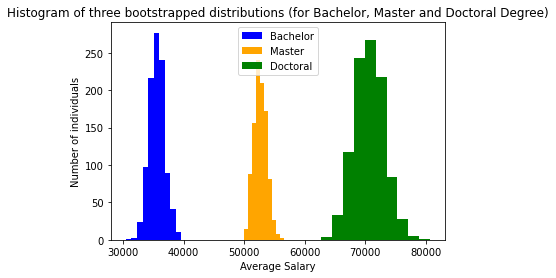

In [29]:
plt.hist(Bachelor_salary, color='blue')
plt.hist(Master_salary, color='orange') 
plt.hist(Doctoral_salary, color='green') 
plt.title('Histogram of three bootstrapped distributions (for Bachelor, Master and Doctoral Degree)') 
plt.legend(['Bachelor', 'Master', 'Doctoral'])  
plt.xlabel('Average Salary')
plt.ylabel('Number of individuals')
plt.show()

Plot the distribution of the difference in means (Bachelor and Master):

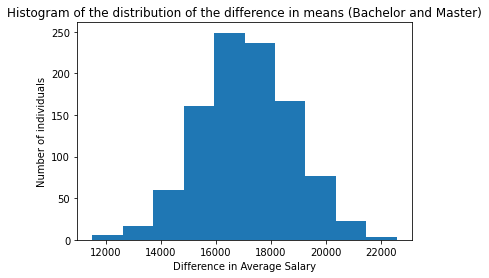

In [30]:
plt.hist(difference_Bachelor_Master)
plt.title('Histogram of the distribution of the difference in means (Bachelor and Master)') 
plt.xlabel('Difference in Average Salary')
plt.ylabel('Number of individuals')
plt.show()

Plot the distribution of the difference in means (Bachelor and Doctoral):

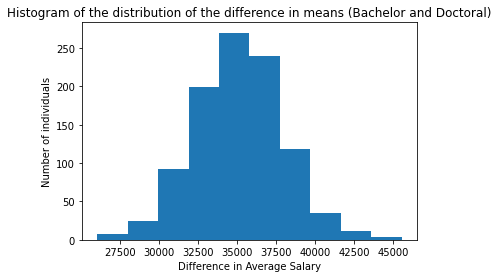

In [31]:
plt.hist(difference_Bachelor_Doctoral)
plt.title('Histogram of the distribution of the difference in means (Bachelor and Doctoral)') 
plt.xlabel('Difference in Average Salary')
plt.ylabel('Number of individuals')
plt.show()

Plot the distribution of the difference in means (Master and Doctoral):

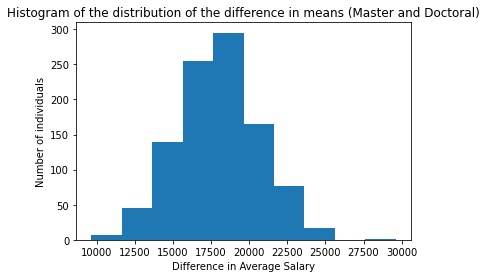

In [32]:
plt.hist(difference_Master_Doctoral)
plt.title('Histogram of the distribution of the difference in means (Master and Doctoral)') 
plt.xlabel('Difference in Average Salary')
plt.ylabel('Number of individuals')
plt.show()

d. If suitable, perform ANOVA test with a 0.05 threshold on the bootstrapped data. Explain your rationale.

Since after bootstrap, the data would be approxiamtely normal which could be visualized from the Histogram of three bootstrapped distributions (for Bachelor, Master and Doctoral Degree), and the variances we printed out below showed that they have homogeneous variance, we could proceed to conduct ANOVA F test.

In [33]:
# variance
print(np.var(Bachelor_salary))
print(np.var(Master_salary))
print(np.var(Doctoral_salary))

1649744.7661353801
1161150.667156978
6111071.54609891


H0: average salary for Bachelor, Master and Doctoral degree are the same on the bootstrapped data

Ha: average salary for at least one of Bachelor, Master and Doctoral degree are different on the bootstrapped data

In [34]:
# ANOVA F test
f_oneway(Bachelor_salary, Master_salary, Doctoral_salary)

F_onewayResult(statistic=103574.98751314984, pvalue=0.0)

Since the p-value of ANOVA F test is smaller than 0.05, we reject the null hypothesis that average salary for Bachelor, Master and Doctoral degree are the same on the bootstrapped data.

e. Comment on your findings.

Comment: The minimum and maximum salary of all these three groups are the same, which implies that it is possible for people from different levels of education to achieve very high salary if they could meet the requirement of the job. However, the median and mean salary as well as the ANOVA F-test results along with the plots above show that people whoes highest formal education level is Doctoral degree have the highest average salary, while people whose highest formal education level is Master's degree have relatively lower average salary, and people whose highest formal education level is Bachelor's degree have the lowest average salary among these three groups. This indicates that education level would impact income level, and overall, people with higher education level in this industry receive relatively higher income. 